### Working with Indicators

ArcGIS Hub uses Indicators to standardize data sources for ready-to-use analysis and comparison. Indicators are measurements of a system including features, calculated metrics, or quantified goals. An Indicator has a schema Definition that describes the meaning, method, and units of an attribute. Currently this structure is used in-line inside the Initiative and Solution Template items.

Indicators are classified into the following:
1. __Measures__ - Data measured over time and space that indicate trends, outliers, and comparisons. (E.g. Street crashes, crime)
2. __Places__ - Important locations that support common public services. (E.g. parks, hospitals)
3. __Boundaries__ - Distinct areas that denote an administrative, operational, or conceptual limit. (E.g. School districts, census tracts)

In [1]:
from arcgis.gis import GIS

In [2]:
gis = GIS("https://www.arcgis.com", 'mmajumdar_dcdev')

Enter password: ········


In [3]:
myHub = gis.hub

Indicators are __*specific to the initiative they are configured in.*__

We start by fetching the initiative we wish to explore the indicators of.

In [4]:
initiativeId = 'a5becab664564eb18a587efb21dcf23d'
vz_init = myHub.initiatives.get(initiativeId)

<Item title:"Vision Zero with Collision Lens App Florida" type:Hub Initiative owner:mmajumdar_dcdev>
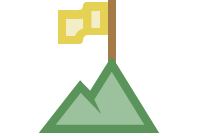

In [5]:
vz_init.item

#### Accessing all indicators for this initiative

To retreive all indicators for an initiative you can `search` without any paramters.

In [6]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>]

Additionally, you can search for indicators based on `url`, `item_id` or `name` of the data item configured as an indicator. 

#### Accessing a particular indicator

To fetch an indicator, you `get` the indicator with its `id`.

Note that only indicators that are existing within solution templates of an initiative and that have been configured can be retreived.

In [7]:
boundary = vz_init.indicators.get('boundary')

You can access properties of the indicator, for instance:

In [8]:
boundary.url

'https://www25.swfwmd.state.fl.us/arcgis12/rest/services/OpenData/Boundaries/MapServer/4'

In [9]:
boundary.mappings

[{'id': 'name',
  'name': 'COUNTYNAME',
  'alias': 'COUNTYNAME',
  'type': 'esriFieldTypeString'}]

The `get_data()` method on the indicator returns the indicator definition

In [10]:
boundaryData = boundary.get_data()
boundaryData

{
  "id": "boundary",
  "name": "boundary",
  "type": "Data",
  "optional": false,
  "definition": {
    "supportedTypes": [
      "FeatureLayer"
    ],
    "geometryTypes": [
      "esriGeometryPolygon"
    ],
    "fields": [
      {
        "name": "name",
        "id": "name",
        "supportedTypes": [
          "esriFieldTypeString"
        ],
        "optional": false
      }
    ]
  },
  "source": {
    "url": "https://www25.swfwmd.state.fl.us/arcgis12/rest/services/OpenData/Boundaries/MapServer/4",
    "layerId": "4",
    "itemId": "3dfca8dbf70b425bb084c7e7f49478ad",
    "name": "Counties_Florida",
    "mappings": [
      {
        "id": "name",
        "name": "COUNTYNAME",
        "alias": "COUNTYNAME",
        "type": "esriFieldTypeString"
      }
    ]
  }
}

#### Adding a new indicator

Adding a new indicator in UI involves launching the 'Add Data' screen from the initiative solution and then mapping applicable dataset and attributes, as follows:

![indicatorModal](https://user-images.githubusercontent.com/13968196/56012844-338d0e00-5cbc-11e9-8418-4d64672e2f10.PNG)

Adding a new indicator using the `hub` submodule of the API is  a 2 step process. 

You store the indicator definition as a dictionary, and pass it as a paramter to the `add` method, as follows:

In [11]:
new_indicator = {"id": "demographics","name": "demographics","type": "Data","optional": False,"definition": {"supportedTypes": ["FeatureLayer"],"geometryTypes": ["esriGeometryPolygon"],"fields": [{"name": "population","id": "population","supportedTypes": ["esriFieldTypeDouble","esriFieldTypeInteger","esriFieldTypeSmallInteger","esriFieldTypeSingle"],"optional": False}]}, "source": {"url": "https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/AGOL_Base_2018_Final/FeatureServer/3","layerId": "3","itemId": "72f186389cb849e882b56af7aa1e546b","name": "Popular Demographics in the United States - Zip Code","mappings": [{"id": "population","name": "TOTPOP_CY","alias": "2018 Total Population (Esri)","type": "esriFieldTypeInteger"}]}}

In [12]:
vz_init.indicators.add(new_indicator)

<Indicator id:"demographics" optional:False>

#### Verfying addition of new indicator

In [13]:
vz_init = myHub.initiatives.get(initiativeId)
indicator = vz_init.indicators.get('demographics')

In [14]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>,
 <Indicator id:"demographics" optional:False>]

#### Updating an indiator

We will try to update the `optional` field of the indicator. To do so, you follow the following steps:

1. Fetch the indicator data (dictionary)
2. Update necessary fields
3. Pass the updated dictionary as a parameter to `update` on the indicator

In [15]:
indicatorData = indicator.get_data()

In [16]:
indicatorData['optional'] = True

In [17]:
indicator = vz_init.indicators.get('demographics')

In [18]:
indicator.update(new_indicator)

True

#### Verifying

In [19]:
vz_init = myHub.initiatives.get(initiativeId)

In [20]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>,
 <Indicator id:"demographics" optional:False>]

We have successfully verified the indicator update.

#### Deleting this indicator

To delete an indicator, you `get` it first and then `delete` it

In [21]:
indicator = vz_init.indicators.get('demographics')

In [22]:
indicator.delete()

True

#### Verifying

In [23]:
vz_init = myHub.initiatives.get(initiativeId)

In [24]:
vz_init.indicators.search()

[<Indicator id:"streetCrashes" optional:False>,
 <Indicator id:"boundary" optional:False>]